In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
import pycountry
import pycountry_convert
from pycountry_convert import country_name_to_country_alpha2

In [4]:
## Pulling data from csvs and storing as dataframes and Cleaning our dataframes
pharm_csv = os.path.join(os.getcwd(), "Data", "pharmacists.csv")
pharm_df = pd.read_csv(pharm_csv)
##Changing column names
pharm_df = pharm_df.rename(columns = {"First Tooltip" : "Pharmicists Per 10,000"}).drop(columns =["Indicator"])

In [5]:
med_doctors_csv = os.path.join(os.getcwd(), "Data", "medicalDoctors.csv")
med_doctors_df = pd.read_csv(med_doctors_csv)
##Changing column names
med_doctors_df = med_doctors_df.rename(columns = {"First Tooltip" : "Medical Doctors Per 10,000"}).drop(columns =["Indicator"])

In [6]:
life_expect_csv = os.path.join(os.getcwd(), "Data", "Life expectancy.csv")
life_expect_df = pd.read_csv(life_expect_csv)
##Changing column names
life_expect_df = life_expect_df.rename(columns = {"Entity" : "Location", "Year" : "Period"})

In [7]:
hand_wash_csv = os.path.join(os.getcwd(), "Data", "basicHandWashing.csv")
hand_wash_df = pd.read_csv(hand_wash_csv)
##Changing column names
hand_wash_df = hand_wash_df.rename(columns = {"First Tooltip" : "Population with basic handwashing facilities at home (%)"}).drop(columns =["Indicator"])
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Urban")==False]
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Rural")==False]
hand_wash_df = hand_wash_df.drop(columns = {"Dim1"})

In [8]:
drink_water_csv = os.path.join(os.getcwd(), "Data", "basicDrinkingWaterServices.csv")
drink_water_df = pd.read_csv(drink_water_csv)
##Changing column names
drink_water_df = drink_water_df.rename(columns = {"First Tooltip" : "Population using at least basic drinking-water services (%)"}).drop(columns =["Indicator"])

In [9]:
sanitize_csv= os.path.join(os.getcwd(), "Data", "atLeastBasicSanitizationServices.csv")
sanitize_df = pd.read_csv(sanitize_csv)
##Changing column names
sanitize_df = sanitize_df.rename(columns = {"First Tooltip" : "Population using at least basic sanitization services (%)"}).drop(columns =["Indicator"])
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Urban")==False]
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Rural")==False]
sanitize_df = sanitize_df.drop(columns = {"Dim1"})

In [10]:
# Merge the Data
merge_df1 = pd.merge(pharm_df, med_doctors_df, on = ["Location", "Period"], how = "outer")
merge_df1

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000"
0,Afghanistan,2016,0.47,2.78
1,Afghanistan,2015,0.50,2.85
2,Afghanistan,2014,0.51,2.98
3,Afghanistan,2012,0.27,2.41
4,Afghanistan,2011,0.28,2.52
...,...,...,...,...
2620,Zimbabwe,2011,NaN,0.82
2621,Zimbabwe,2008,NaN,0.60
2622,Zimbabwe,2007,NaN,0.54
2623,Zimbabwe,2005,NaN,1.26


In [11]:
merge_df2 = pd.merge(merge_df1, life_expect_df, on = ["Location", "Period"], how = "outer")
merge_df2

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life expectancy
0,Afghanistan,2016,0.47,2.78,NaN
1,Afghanistan,2015,0.50,2.85,NaN
2,Afghanistan,2014,0.51,2.98,NaN
3,Afghanistan,2012,0.27,2.41,NaN
4,Afghanistan,2011,0.28,2.52,NaN
...,...,...,...,...,...
5637,United States,2012,NaN,NaN,78.940002
5638,United States,2013,NaN,NaN,78.959999
5639,United States,2014,NaN,NaN,78.940002
5640,United States,2015,NaN,NaN,78.870003


In [12]:
merge_df3 = pd.merge(merge_df2, hand_wash_df, on = ["Location", "Period"], how = "outer")
merge_df4 = pd.merge(merge_df3, drink_water_df, on = ["Location", "Period"], how = "outer")
final_merge_df = pd.merge(merge_df4, sanitize_df, on = ["Location", "Period"], how = "outer")
final_merge_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
0,Afghanistan,2016,0.47,2.78,NaN,37.67,54.84,42.05
1,Afghanistan,2015,0.50,2.85,NaN,37.59,52.39,40.71
2,Afghanistan,2014,0.51,2.98,NaN,37.52,49.96,39.37
3,Afghanistan,2012,0.27,2.41,NaN,37.37,45.19,36.75
4,Afghanistan,2011,0.28,2.52,NaN,37.30,42.84,35.46
...,...,...,...,...,...,...,...,...
7079,Zimbabwe,2003,NaN,NaN,NaN,NaN,58.59,46.11
7080,Zimbabwe,2002,NaN,NaN,NaN,NaN,59.23,46.15
7081,Zimbabwe,2001,NaN,NaN,NaN,NaN,59.88,46.05
7082,Republic of Korea,2001,NaN,NaN,NaN,NaN,NaN,100.00


In [13]:
final_merge_df.describe()

,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
count,7084.000000,1795.000000,2506.000000,3253.000000,921.000000,3455.000000,3439.000000
mean,1961.520045,4.124118,20.685012,48.680380,47.501911,77.847103,71.211966
std,65.208711,3.624610,14.299267,17.965669,32.774406,23.987570,30.342367
min,1800.000000,0.002000,0.130000,8.108836,1.030000,10.130000,3.400000
25%,1918.000000,0.790000,7.782500,32.000000,13.980000,59.895000,45.850000
50%,2000.000000,3.530000,21.280000,41.880001,44.520000,87.650000,85.260000
75%,2009.000000,6.390000,31.660000,66.820000,81.740000,98.460000,97.630000
max,2018.000000,26.300000,84.220000,83.940002,100.000000,100.000000,100.000000


In [14]:
# Finding the number of countries
country = final_merge_df["Location"].nunique()
country

198

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drinking_water_df = pd.DataFrame(final_merge_df.groupby(["Location","Population using at least basic drinking-water services (%)"]).count()).reset_index() 

#Alter the dataframe down to two columns 
drinking_water_df = drinking_water_df[["Location", ("Population using at least basic drinking-water services (%)")]] 
drinking_water_df = drinking_water_df.set_index("Location")
drinking_water_df.head()

,Population using at least basic drinking-water services (%)
Location,
Afghanistan,21.62
Afghanistan,23.60
Afghanistan,25.58
Afghanistan,27.56
Afghanistan,29.54


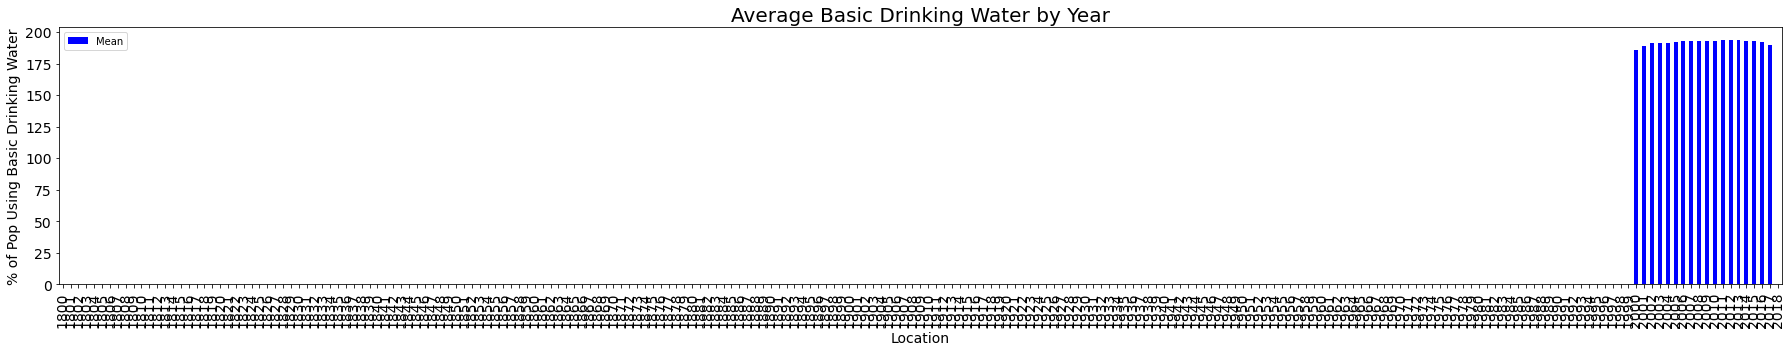

In [24]:
# Create the Bar Chart
drinking_water_df.plot(kind="bar",figsize=(25,5), color="b",fontsize = 14)                           
plt.title("Average Basic Drinking Water by Year",fontsize = 20)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("% of Pop Using Basic Drinking Water",fontsize = 14)
plt.tight_layout()
plt.show()

In [17]:
drinking_water_mean = final_merge_df.groupby(["Location","Period"])["Population using at least basic drinking-water services (%)"].mean()
drinking_water_median = final_merge_df.groupby(["Location","Period"])["Population using at least basic drinking-water services (%)"].median()
drinking_water_var = final_merge_df.groupby(["Location","Period"])["Population using at least basic drinking-water services (%)"].var()
drinking_water_std = final_merge_df.groupby(["Location","Period"])["Population using at least basic drinking-water services (%)"].std()
drinking_water_sem = final_merge_df.groupby(["Location","Period"])["Population using at least basic drinking-water services (%)"].sem()

In [18]:
drinking_water_table = pd.DataFrame({"Mean": drinking_water_mean, "Median":drinking_water_median, "Variance":drinking_water_var, "Standard Deviation": drinking_water_std, "SEM": drinking_water_sem})
drinking_water_table.head()

Mean  Median  Variance  Standard Deviation  SEM
Location    Period                                                  
Afghanistan 2000    21.62   21.62       NaN                 NaN  NaN
            2001    21.62   21.62       NaN                 NaN  NaN
            2002    23.60   23.60       NaN                 NaN  NaN
            2003    25.58   25.58       NaN                 NaN  NaN
            2004    27.56   27.56       NaN                 NaN  NaN

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drinking_water_data = pd.DataFrame(drinking_water_table.groupby(["Period"]).count()).reset_index() 

#Alter the dataframe down to two columns 
drinking_water_df = drinking_water_data[["Period", "Mean"]] 
drinking_water_df = drinking_water_df.set_index("Period")
drinking_water_df.head()

,Mean
Period,
1800,0
1801,0
1802,0
1803,0
1804,0


In [ ]:
asia_continent = ["China","India","Indonesia","Pakistan","Bangladesh","Japan","Philippines","Vietnam","Turkey",
"Iran","Thailand","Myanmar","South Korea","Iraq","Afghanistan","Saudi Arabia","Uzbekistan","Malaysia","Yemen",
"Nepal","North Korea","Taiwan","Sri Lanka","Kazakhstan","Syria","Cambodia","Jordan","Azerbaijan",
"United Arab Emirates","Tajikistan","Israel","Hong Kong","Laos","Lebanon","Kyrgyzstan","Turkmenistan",
"Singapore","Oman","State of Palestine","Kuwait","Georgia","Mongolia","Armenia","Qatar","Bahrain","Timor-Leste",
"Cyprus","Bhutan","Macao","Maldives","Brunei Darussalam"]

In [ ]:
africa_continent = ["Nigeria","Ethiopia","Egypt","Democratic Republic of the Congo","Tanzania","South Africa",
"Kenya","Uganda","Algeria","Sudan","Morocco","Angola","Mozambique","Ghana","Madagascar","Cameroon","Côte d'Ivoire",
"Niger","Burkina Faso","Mali","Malawi","Zambia","Senegal","Chad","Somalia","Zimbabwe","Guinea","Rwanda","Benin",
"Burundi","Tunisia","South Sudan","Togo","Sierra Leone","Libya","Congo","Liberia","Central African Republic",
"Mauritania","Eritrea","Namibia","Gambia","Botswana","Gabon","Lesotho","Guinea-Bissau","Equatorial Guinea",
"Mauritius","Eswatini","Djibouti","Réunion","Comoros","Western Sahara","Cabo Verde","Mayotte","Sao Tome and Principe",
"Seychelles","Saint Helena"]

In [ ]:
europe_continent = ["Russia","Germany","United Kingdom","France","Italy","Spain","Ukraine","Poland","Romania",
"Netherlands","Belgium","Czechia","Greece","Portugal","Sweden","Hungary","Belarus","Austria","Serbia","Switzerland",
"Bulgaria","Denmark","Finland","Slovakia","Norway","Ireland","Croatia","Moldova","Bosnia and Herzegovina","Albania",
"Lithuania","North Macedonia","Slovenia","Latvia","Estonia","Montenegro","Luxembourg","Malta","Iceland","Channel Islands",
"Isle of Man","Andorra","Faeroe Islands","Monaco","Liechtenstein","San Marino","Gibraltar","Holy See"]

In [ ]:
north_america_continent = ["United States","Mexico","Canada","Guatemala","Haiti","Cuba","Dominican Republic","Honduras",
"Nicaragua","El Salvador","Costa Rica","Panama","Jamaica","Puerto Rico","Trinidad and Tobago","Guadeloupe","Belize",
"Bahamas","Martinique","Barbados","Saint Lucia","Curaçao","Grenada","Saint Vincent and the Grenadines","Aruba",
"United States Virgin Islands","Antigua and Barbuda","Dominica","Cayman Islands","Bermuda","Greenland","Saint Kitts and Nevis",
"Sint Maarten","Turks and Caicos Islands","Saint Martin","British Virgin Islands","Caribbean Netherlands","Anguilla",
"Saint Barthélemy","Saint Pierre and Miquelon","Montserrat"]

In [ ]:
south_america_continent = ["Brazil","Colombia","Argentina","Peru","Venezuela","Chile","Ecuador","Bolivia",
"Paraguay","Uruguay","Guyana","Suriname","French Guiana","Falkland Islands"]

In [ ]:
australia_oceania_continent = ["Australia","Papua New Guinea","New Zealand","Fiji","Solomon Islands",
"Micronesia","Vanuatu","New Caledonia","French Polynesia","Samoa","Guam","Kiribati","Tonga",
"Marshall Islands","Northern Mariana Islands","American Samoa","Palau","Cook Islands","Tuvalu",
"Wallis and Futuna Islands","Nauru","Niue","Tokelau"]